## Baseball Stat

These are examples and data (baseball.csv) I grabbed off of Github and modified. They originated with a DataCamp exercise.

**This was my first attempt at playing with data. Check out my other notebooks first, unless you really love baseball**

In [1]:
# Boilerplate Environment. See notebook: 0_Getting_Started_with_Statistics_and_Python# Boile 

# Determining enviornment
def at_google_colab():
    try:
        cfg = get_ipython().config 
        if cfg['IPKernelApp']['kernel_class'] == 'google.colab._kernel.Kernel':
            return True
        else:
            return False
    except NameError:
        return False

# where are we?
location = None
if at_google_colab():
    location = 'at Google'
else:
    location = 'locally'

# print prediction
print('I think you are running {}!'.format(location))

# Import packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt    
if at_google_colab:
    %matplotlib inline
else:
    %matplotlib notebook


# Example of loading locally
#baseball = pd.read_csv('baseball.csv')
if at_google_colab:
    url = 'https://raw.githubusercontent.com/cscollett/PlayingWithStats/master/baseball.csv'
    baseball = pd.read_csv(url,index_col=0,parse_dates=[0])
    baseball.head()
else:
    # Example of loading locally
    baseball = pd.read_csv('baseball.csv')

I think you are running locally!


In [2]:
# Create a 2D numpy array from baseball: np_baseball
np_baseball = np.array(baseball)

# Print out the shape of np_baseball (rows, columns)
print(np_baseball.shape)

(1015, 6)


In [3]:
# Create np_height from table (height is the 3rd column)
np_height = np.array(np_baseball[:,3])


In [4]:
print("Baseball Player Height")

h_avg = np.mean(np_height)
print("Average: " + str(h_avg))

h_med = np.median(np_height)
print("Median: " + str(h_med))

h_mode = stats.mode(np_height)[0][0]
print("Mode: " + str(h_mode))

h_stddev = np.std(np_height)
print("Standard Deviation: " + str(h_stddev))


Baseball Player Height
Average: 201.34876847290641
Median: 200.0
Mode: 200
Standard Deviation: 20.812854496114745


In [5]:
# Create np_weight from table (weight is the 3rd column)
np_weight = np.array(np_baseball[:,4])
print(np_weight)

[22.99 34.69 30.78 ... 25.19 31.01 27.92]


In [6]:
print("Baseball Player Weight")

w_avg = np.mean(np_weight)
print("Average: " + str(w_avg))

w_med = np.median(np_weight)
print("Median: " + str(w_med))

w_mode = stats.mode(np_weight)[0][0]
print("Mode: " + str(w_mode))

w_stddev = np.std(np_weight)
print("Standard Deviation: " + str(w_stddev))


Baseball Player Weight
Average: 28.708354679802923
Median: 27.9
Mode: 24.94
Standard Deviation: 4.312326809808862


In [7]:
# Pearson's correlation
# https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/
    
# Print out correlation between height and wegiht
corr_matrix = np.corrcoef(np_height.astype(float), np_weight.astype(float))

# get correlation from matrix
corr_num = corr_matrix[1,0]

print("Correlation of Height and Weight: " + str(corr_num))

Correlation of Height and Weight: 0.14371113458624662


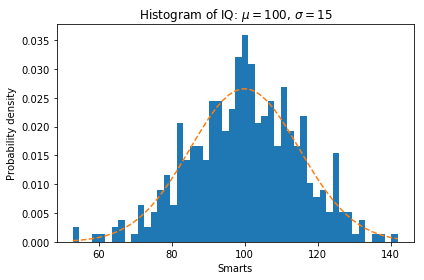

In [8]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


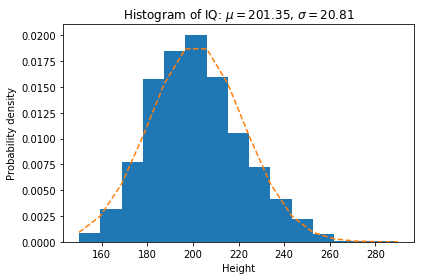

In [9]:
mu = h_avg
sigma = h_stddev
x = np_height.astype(float)

num_bins = 15

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
# y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#      np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Height')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu={0:.2f}$, $\sigma={1:.2f}$'.format(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()